# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r"/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Percentage of null values

In [7]:
(df.isnull().sum() / df.shape[0])*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

# Drop the null value

In [8]:
df.drop(columns=["director"],inplace=True)

# Fill the null values

In [9]:
list = []

In [10]:
for i in df.select_dtypes(include = ["object"],).columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
    

/tmp/ipykernel_17/3618991704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df["show_id"]

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
8802    s8803
8803    s8804
8804    s8805
8805    s8806
8806    s8807
Name: show_id, Length: 8807, dtype: object

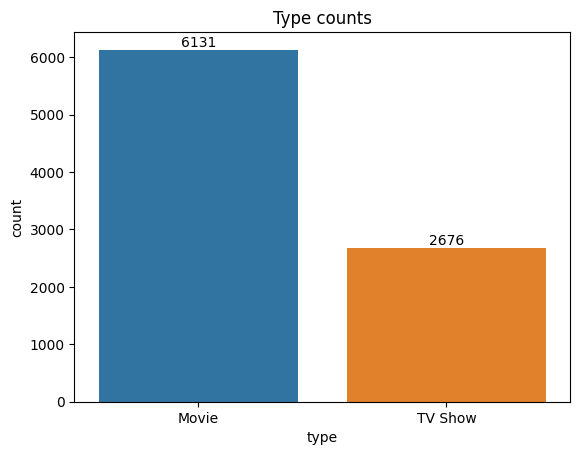

In [13]:
ax = sns.countplot(x ="type" ,data=df)
plt.title("Type counts")
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
df["cast"].value_counts()

cast
David Attenborough                                                                                                                                                                            844
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
Craig Sechler                                                                                                                                                                                   6
                         

In [15]:
df["country"].value_counts()

country
United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

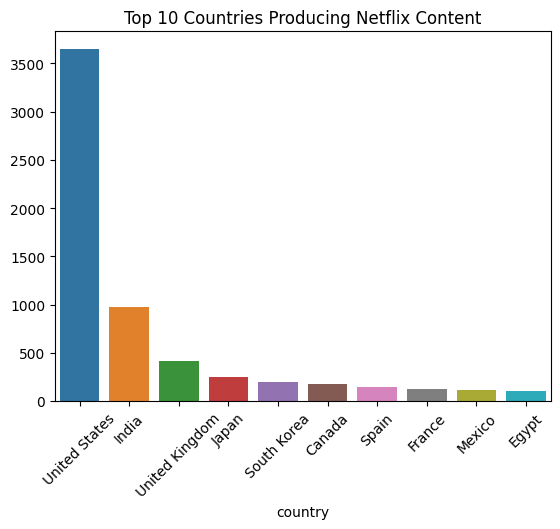

In [16]:
country_10 = df["country"].value_counts().head(10)
sns.barplot(x = country_10.index,y=country_10.values)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xticks(rotation=45)
plt.show()

In [17]:
country_10

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

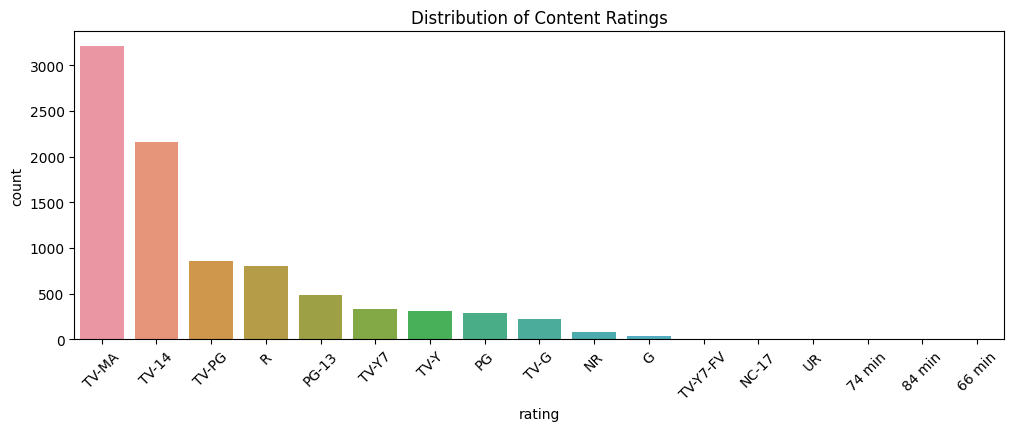

In [18]:
plt.figure(figsize = (12,4))
sns.countplot(data=df,x = "rating",order = df["rating"].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

In [19]:
df["rating"].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


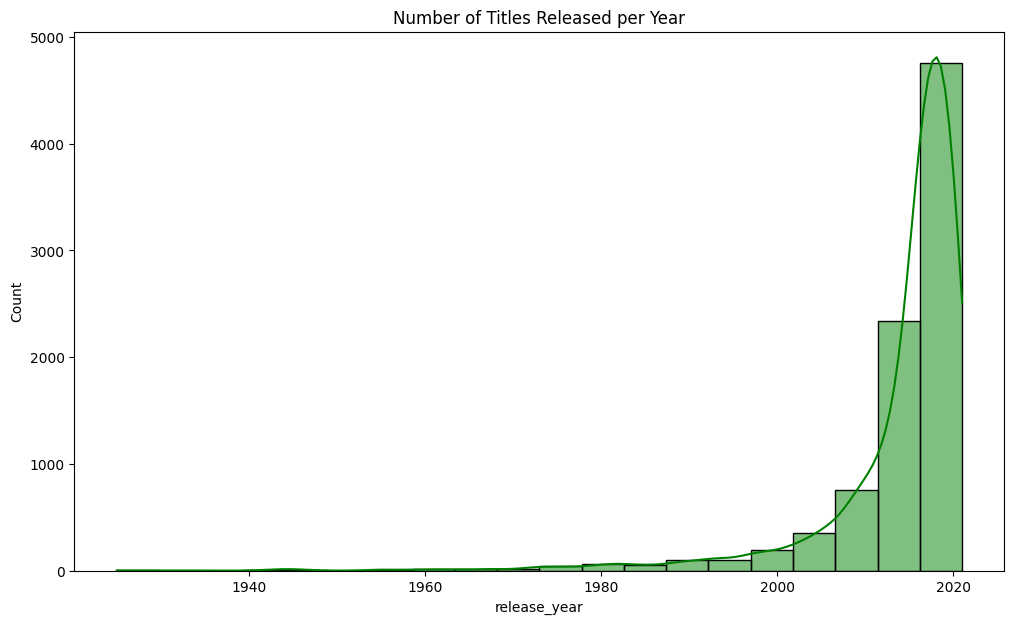

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(data=df,x="release_year",kde=True,bins = 20,color = "green")
plt.title('Number of Titles Released per Year')
plt.show()

In [21]:
df["duration"]

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


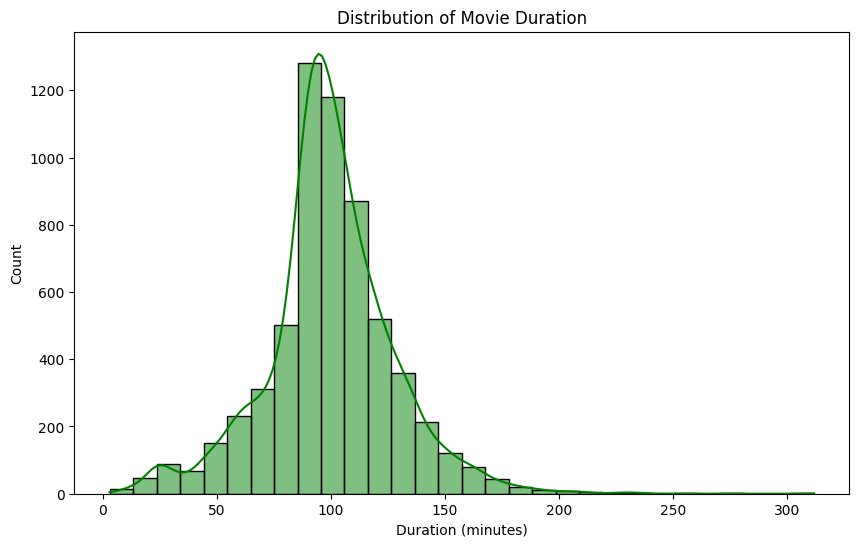

In [22]:
# Filter the DataFrame to only include movies
df_movies = df[df['type'] == 'Movie']

# Further filter rows where 'duration' contains ' min' to avoid issues with non-movie entries
df_movies = df_movies[df_movies['duration'].str.contains(' min')]

# Remove the ' min' suffix from the duration and convert to float
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(data=df_movies, x='duration', bins=30, kde=True, color='green')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.show()


Discussion of the Netflix Dataset Analysis:
Data Overview:

The dataset consists of 8,807 entries and 12 columns, with information about different Netflix titles. The columns include show_id, type (Movie or TV Show), title, cast, country, release_year, rating, duration, listed_in (genres), and a brief description of each title.
Missing Data:

Some columns have missing data, particularly director (29.91% missing), cast (9.37%), and country (9.44%). These missing values are handled by dropping the director column and using the mode (most frequent value) to fill missing values for other categorical columns.
Distribution of Content Type:

A countplot shows the breakdown of content types: Movies vs. TV Shows. Movies are more frequent than TV Shows, but there is a significant amount of both types on Netflix.
Top Countries Producing Netflix Content:

The top 10 countries producing Netflix content are visualized. The United States is the dominant producer with 3,649 titles, followed by India and United Kingdom. This distribution shows Netflix’s international content reach but also highlights that the majority of its content comes from the US.
Content Ratings:

The dataset includes different content ratings (e.g., TV-MA, TV-14, R, etc.). The most common rating is TV-MA, which suggests a large portion of Netflix content is intended for mature audiences. This reflects Netflix’s strategy of targeting adult viewers with shows that often include more mature themes.
Release Year Trends:

A histogram of release years shows that Netflix’s content library has rapidly expanded in recent years. The majority of titles were added between 2010 and 2020, with a significant rise starting around 2015. This indicates Netflix’s aggressive push in producing or acquiring new content during the streaming boom.
Movie Duration Distribution:

Focusing on movies, a histogram shows the distribution of their durations. Most movies have a runtime of around 90–120 minutes, which is typical for feature films. A few outliers exist with notably longer durations.
Handling of TV Show Durations:

TV Shows often have durations listed as seasons (e.g., "1 Season", "2 Seasons"), which differs from movies that have durations listed in minutes. This difference was handled by filtering only movies for the duration analysis, avoiding potential errors from non-numeric values in the duration column.
Conclusion:

The analysis provides a good overview of the diversity of Netflix’s content, revealing patterns in content type, production countries, and ratings. The dominance of the US in content production, the large amount of mature-rated content, and the recent increase in titles all reflect Netflix’s strategy as a global content platform catering to various audiences.






